# LETS GROW MORE-DATA SCIENCE INTERN

# ADVANCED LEVEL TASK

# Task-2: Next Word Prediction

In [ ]:
#IMPORTING LIBRARIES
import numpy as np
np.random.seed(42)
import tensorflow as tf
tf.random.set_seed(42)
 
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import LSTM, Dropout
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Dense, Activation, Dropout, RepeatVector
from tensorflow.keras.optimizers import  RMSprop
import matplotlib.pyplot as plt
import pickle
import heapq

In [ ]:
from google.colab import drive

In [ ]:
#importing data to drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Loading the data
path = '/content/Next Word Prediction.txt'
text = open(path,encoding = "utf8").read().lower()
print('corpus length:', len(text))

corpus length: 581888


In [ ]:
#Data Pre -Processing
character = sorted(list(set(text)))
char_indices = dict((c, i) for i, c in enumerate(character))
indices_char = dict((i, c) for i, c in enumerate(character))
 
print(f'unique chars: {len(character)}')

unique chars: 73


In [ ]:
seq_len = 40
step = 3
sentences = []
next_chars = []
for i in range(0, len(text) - seq_len, step):
    sentences.append(text[i: i + seq_len ])
    next_chars.append(text[i + seq_len])
print(f'num training examples: {len(sentences)}')

num training examples: 193950


In [ ]:
X = np.zeros((len(sentences), seq_len, len(character)), dtype=np.bool)
y = np.zeros((len(sentences), len(character)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        X[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

sentences[124]
next_chars[100]

<ipython-input-12-b837ced14d63>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = np.zeros((len(sentences), seq_len, len(character)), dtype=np.bool)
<ipython-input-12-b837ced14d63>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = np.zeros((len(sentences), len(character)), dtype=np.bool)


'e'

In [ ]:
X[0][0]


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True])

In [ ]:
y[0]


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [ ]:
X.shape


(193950, 40, 73)

In [ ]:
y.shape


(193950, 73)

In [ ]:
model = Sequential()
model.add(LSTM(128, input_shape=(seq_len, len(character))))
model.add(Dense(len(character)))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               103424    
                                                                 
 dense_1 (Dense)             (None, 73)                9417      
                                                                 
 activation_1 (Activation)   (None, 73)                0         
                                                                 
Total params: 112,841
Trainable params: 112,841
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Traning the model
optimizer = RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X, y,
                    validation_split=0.01, 
                    batch_size=128,
                    epochs=7, 
                    shuffle=True).history

Epoch 1/7
1501/1501 [==============================] - 236s 156ms/step - loss: 2.0496 - accuracy: 0.4006 - val_loss: 2.2732 - val_accuracy: 0.3814
Epoch 2/7
1501/1501 [==============================] - 251s 167ms/step - loss: 1.6732 - accuracy: 0.4979 - val_loss: 2.0754 - val_accuracy: 0.4247
Epoch 3/7
1501/1501 [==============================] - 232s 154ms/step - loss: 1.5536 - accuracy: 0.5314 - val_loss: 1.9887 - val_accuracy: 0.4412
Epoch 4/7
1501/1501 [==============================] - 232s 154ms/step - loss: 1.4896 - accuracy: 0.5494 - val_loss: 1.9376 - val_accuracy: 0.4567
Epoch 5/7
1501/1501 [==============================] - 233s 155ms/step - loss: 1.4468 - accuracy: 0.5616 - val_loss: 1.9186 - val_accuracy: 0.4835
Epoch 6/7
1501/1501 [==============================] - 232s 154ms/step - loss: 1.4155 - accuracy: 0.5686 - val_loss: 1.9325 - val_accuracy: 0.4830
Epoch 7/7
1501/1501 [==============================] - 232s 154ms/step - loss: 1.3933 - accuracy: 0.5762 - val_loss: 1

In [ ]:
model.save('NW_keras_model.h5')
pickle.dump(history, open("history.p", "wb"))

In [ ]:
model = load_model('NW_keras_model.h5')
history = pickle.load(open("history.p", "rb"))

In [ ]:
#Evaluating the model
loss_and_acc=model.evaluate(X,y)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

6061/6061 [==============================] - 187s 31ms/step - loss: 1.3508 - accuracy: 0.5864
Test Loss 1.3508411645889282
Test Accuracy 0.586393415927887


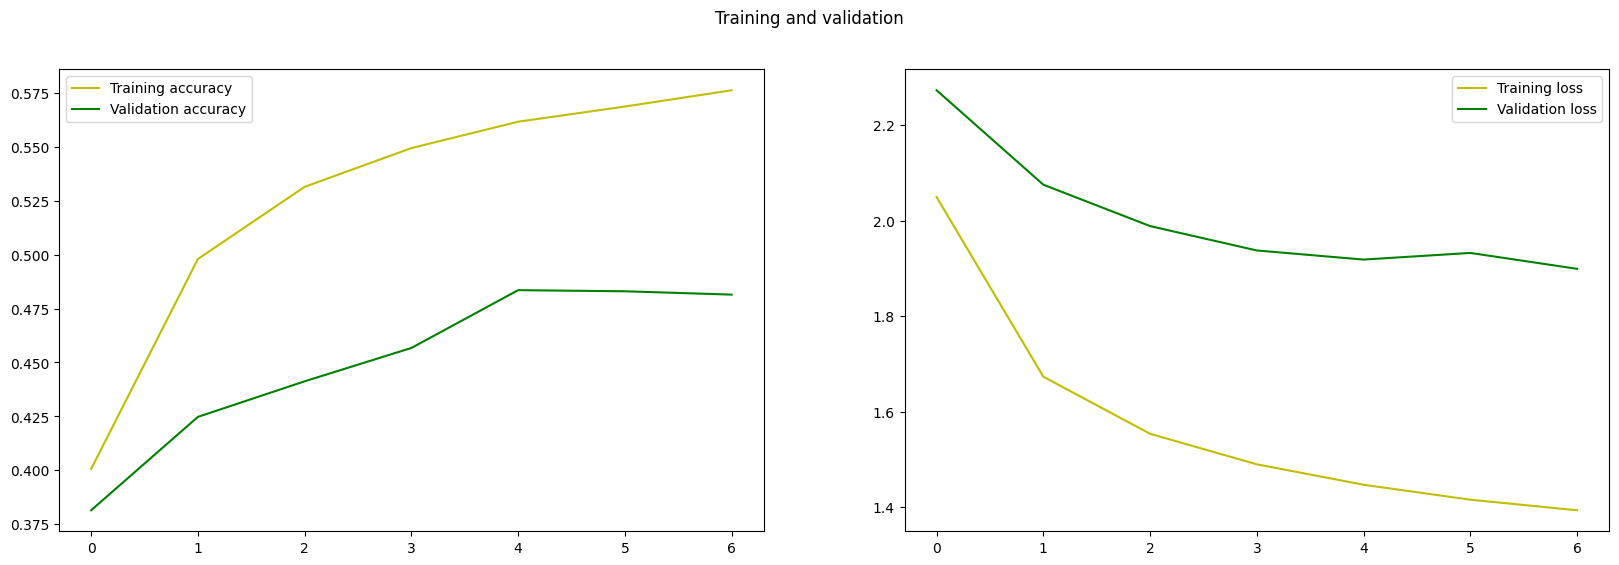

In [ ]:
#Plotting
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']
epochs = range(len(acc))
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
ax[0].plot(epochs, acc, 'y', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'g', label='Validation accuracy')
ax[0].legend(loc=0)
ax[1].plot(epochs, loss, 'y', label='Training loss')
ax[1].plot(epochs, val_loss, 'g', label='Validation loss')
ax[1].legend(loc=0)

plt.suptitle('Training and validation')
plt.show()

In [ ]:
def prepare_input(text):
    x = np.zeros((1, seq_len, len(character)))
    for t, char in enumerate(text):
        x[0, t, char_indices[char]] = 1.
    return x
prepare_input("This is an example of input of our model".lower())

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [ ]:
def sample(preds, top_n=3):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    return heapq.nlargest(top_n, range(len(preds)), preds.take)
def predict_completion(text):
    original_text = text
    generated = text
    completion = ''
    while True:
        x = prepare_input(text)
        preds = model.predict(x, verbose=0)[0]
        next_index = sample(preds, top_n=1)[0]
        next_char = indices_char[next_index]
        text = text[1:] + next_char
        completion += next_char
        
        if len(original_text + completion) + 2 > len(original_text) and next_char == ' ':
            return completion

In [ ]:
def predict_completions(text, n=3):
    x = prepare_input(text)
    preds = model.predict(x, verbose=0)[0]
    next_indices = sample(preds, n)
    return [indices_char[idx] + predict_completion(text[1:] + indices_char[idx]) for idx in next_indices]

In [ ]:
quotes = [   
    "Deep learning is a branch of machine learning which is based on artificial neural networks.",
    "It is capable of learning complex patterns and relationships within data.",
    "In deep learning, we don’t need to explicitly program everything. It has become increasingly popular in recent years due to the advances in processing power and the availability of large datasets.",
    "Because it is based on artificial neural networks (ANNs) also known as deep neural networks (DNNs).",
    "These neural networks are inspired by the structure and function of the human brain’s biological neurons, and they are designed to learn from large amounts of data."  
    
]
for q in quotes:
    seq = q[:40].lower()
    print(seq)
    print(predict_completions(seq, 5))
    print()

deep learning is a branch of machine lea
['st ', 'd ', 'ge ', 'rner ', 've ']

it is capable of learning complex patter
['led ', 'ed ', 's ', '. ', ' and ']

in deep learning, we don’t need to expli
['me ', 'bate ', 'se ', 'ge ', 'ne ']

because it is based on artificial neural
[' of ', 's ', ', ', '. ', '\nof ']

these neural networks are inspired by th
['e ', 'is ', 'at ', 'ose ', 'ree ']

